In [1]:
import os
from groundingdino.util.inference import load_model, load_image, predict, annotate
import supervision as sv
import torchvision
import torch

In [2]:
HOME = '../GroundingDINO'
CONFIG_PATH = os.path.join(HOME, "groundingdino/config/GroundingDINO_SwinB_cfg.py")
print(CONFIG_PATH, "; exist:", os.path.isfile(CONFIG_PATH))
WEIGHTS_NAME = "groundingdino_swinb_cogcoor.pth"
WEIGHTS_PATH = os.path.join(HOME, "weights", WEIGHTS_NAME)
print(WEIGHTS_PATH, "; exist:", os.path.isfile(WEIGHTS_PATH))

../GroundingDINO/groundingdino/config/GroundingDINO_SwinB_cfg.py ; exist: True
../GroundingDINO/weights/groundingdino_swinb_cogcoor.pth ; exist: True


In [3]:
model = load_model(CONFIG_PATH, WEIGHTS_PATH)

/home/alex/Programming/netris/Segment-Everything-Everywhere-All-At-Once/venv/lib/python3.8/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


8
5


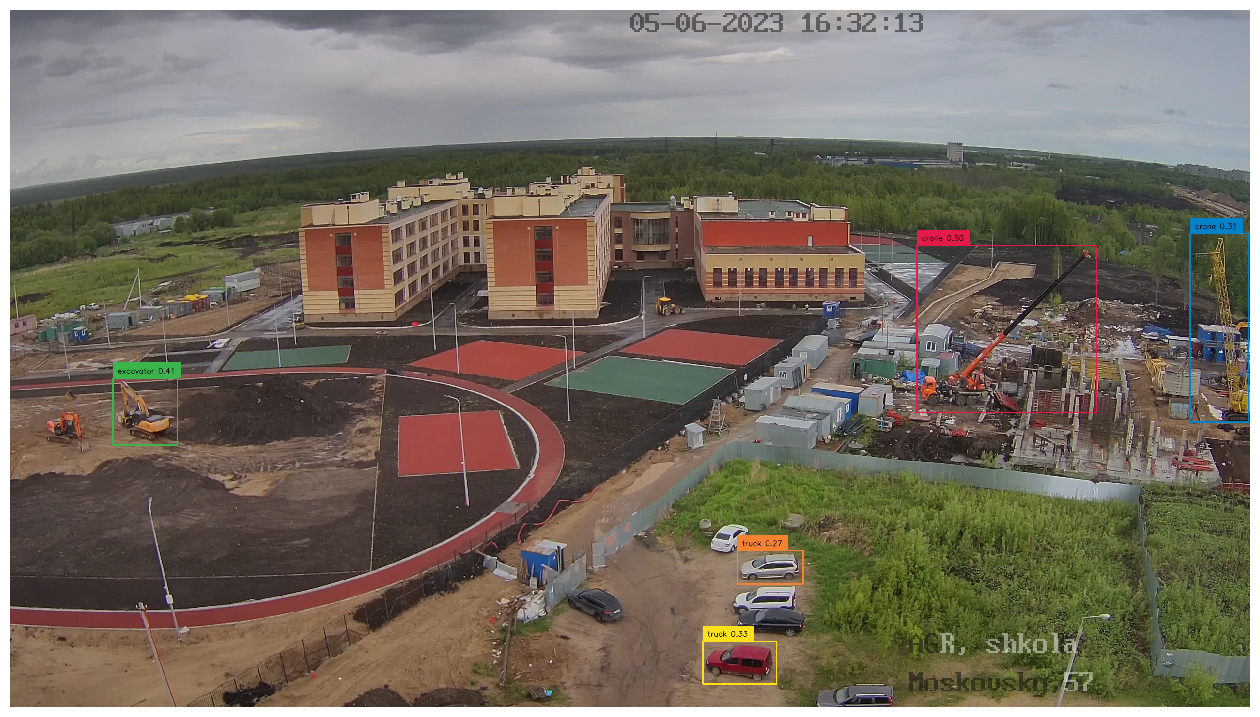

In [12]:
IMAGE_NAME = "test.png"
IMAGE_PATH = os.path.join("test_data", IMAGE_NAME)

TEXT_PROMPT = "crane, excavator, bulldozer, truck" #"crane, excavator" 
BOX_TRESHOLD = 0.25
TEXT_TRESHOLD = 0.2

image_source, image = load_image(IMAGE_PATH)

boxes_cxcywh, logits, phrases = predict(
    model=model, 
    image=image, 
    caption=TEXT_PROMPT, 
    box_threshold=BOX_TRESHOLD, 
    text_threshold=TEXT_TRESHOLD
)
h, w, _ = image_source.shape
boxes = boxes_cxcywh * torch.Tensor([w, h, w, h])
boxes = torchvision.ops.box_convert(boxes=boxes, in_fmt="cxcywh", out_fmt="xyxy")
idxs = torchvision.ops.nms(boxes, logits, 0.7)
print(len(boxes_cxcywh))
print(len(idxs))


annotated_frame = annotate(image_source=image_source, boxes=boxes_cxcywh.index_select(0, idxs), logits=logits.index_select(0, idxs), phrases=[phrases[idx] for idx in idxs])

%matplotlib inline  
sv.plot_image(annotated_frame, (16, 16))